In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('/Users/adriennekirk/Desktop/Flash Droughts/')  
from FlashDroughts import KDEhistogram, DroughtDetection, FlashDrought


df = pd.read_csv('UpdatedCounties.csv')

In [2]:
import pandas as pd
import re
import numpy as np

# Clean function
def clean_coord(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()
    val = re.sub(r'[–—−]', '-', val)  # replace Unicode dashes with -
    val = val.replace('°', '')        # remove degree symbol
    try:
        return float(val)
    except ValueError:
        return np.nan

# Apply to both columns
df['lat'] = df['lat'].apply(clean_coord)
df['lon'] = df['lon'].apply(clean_coord)

In [3]:
df = df.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'])
# counties_to_keep = ['Knox', 'Calvert', 'Cecil', 'Talbot', 'Barnstable', 'Nantucket', 'Suffolk', 'Monroe', 'Niagara', 'Orleans', 'Wayne']
# filtered_df = df[df['county'].isin(counties_to_keep)]
df.head(25)

,state,county,lat,lon
0,CT,Fairfield,41.228103,-73.366757
1,CT,Hartford,41.806053,-72.732916
2,CT,Litchfield,41.791897,-73.235428
3,CT,Middlesex,41.434525,-72.524227
4,CT,New Haven,41.349717,-72.900204
5,CT,New London,41.478630,-72.103452
6,CT,Tolland,41.858076,-72.340977
7,CT,Windham,41.824999,-71.990702
8,DE,Kent,39.097088,-75.502982
9,DE,New Castle,39.575915,-75.644132


In [4]:
locations = df[['state', 'county', 'lat', 'lon']].to_dict(orient='records')

In [5]:
fd = FlashDrought(locations)

In [6]:
fd.combined_df()

/Users/adriennekirk/miniconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/adriennekirk/miniconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/adriennekirk/miniconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/adriennekirk/miniconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/adriennekirk/miniconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=d

,State,County,lat,lon,# Droughts VWC (2 CAT/2wk)(Tuesdays),# Droughts VWC (2 CAT/4wk)(Tuesdays),# Droughts VWC (-2 Z-SCORE/2wk)(Tuesdays),# Droughts VWC (-2 Z-SCORE/4wk)(Tuesdays),Highest Month VWC (2 CAT/2wk)(Tuesdays),Highest Month VWC (2 CAT/4wk)(Tuesdays),Highest Month VWC (-2 Z-SCORE/2wk)(Tuesdays),Highest Month VWC (-2 Z-SCORE/4wk)(Tuesdays)
0,CT,Fairfield,41.228103,-73.366757,26,20,54,45,[April],[April],[June],[June]
1,CT,Hartford,41.806053,-72.732916,16,16,26,28,[April],"[March, September, April]",[June],[June]
2,CT,Litchfield,41.791897,-73.235428,28,21,48,48,[April],[April],[May],[June]
3,CT,Middlesex,41.434525,-72.524227,34,25,53,41,[April],[September],[June],[June]
4,CT,New Haven,41.349717,-72.900204,24,18,41,32,[April],[April],[June],[June]
...,...,...,...,...,...,...,...,...,...,...,...,...
295,WV,Webster,38.492985,-80.430262,37,41,35,33,[April],[June],[May],[July]
296,WV,Wetzel,39.596574,-80.634394,17,13,22,33,[April],[March],[May],[July]
297,WV,Wirt,39.020034,-81.382975,20,18,31,35,[April],[April],[May],[June]
298,WV,Wood,39.211679,-81.515928,13,12,21,28,[April],"[March, April]","[July, May]","[April, June, July]"


In [7]:
combined = _  # ← the underscore `_` grabs the most recent output

combined.to_csv('Northeastern VWC Residuals Data.csv')

In [13]:
import shapefile
from shapely.geometry import shape
import pandas as pd

# Load county shapefile
sf = shapefile.Reader("/Users/adriennekirk/Downloads/tl_2020_us_county/tl_2020_us_county.shp")
records = sf.shapeRecords()

# FIPS to state abbreviation
statefp_to_abbr = {
    '09': 'CT', '23': 'ME', '25': 'MA', '33': 'NH', '34': 'NJ',
    '36': 'NY', '42': 'PA', '44': 'RI', '50': 'VT', '24': 'MD',
    '54': 'WV', '10': 'DE'
}

# Build the list of records
rows = []

for rec in records:
    attrs = rec.record.as_dict()
    county_name = attrs['NAME'].title().strip()
    statefp = attrs['STATEFP']
    state_abbr = statefp_to_abbr.get(statefp)

    if not state_abbr:
        continue  # skip counties not in your selected states
    geom = shape(rec.shape.__geo_interface__)
    rep_point = geom.representative_point()
    lon, lat = rep_point.x, rep_point.y

    rows.append({
        'state': state_abbr,
        'county': county_name,
        'lat': lat,
        'lon': lon
    })

# Create DataFrame
centroids_df = pd.DataFrame(rows)


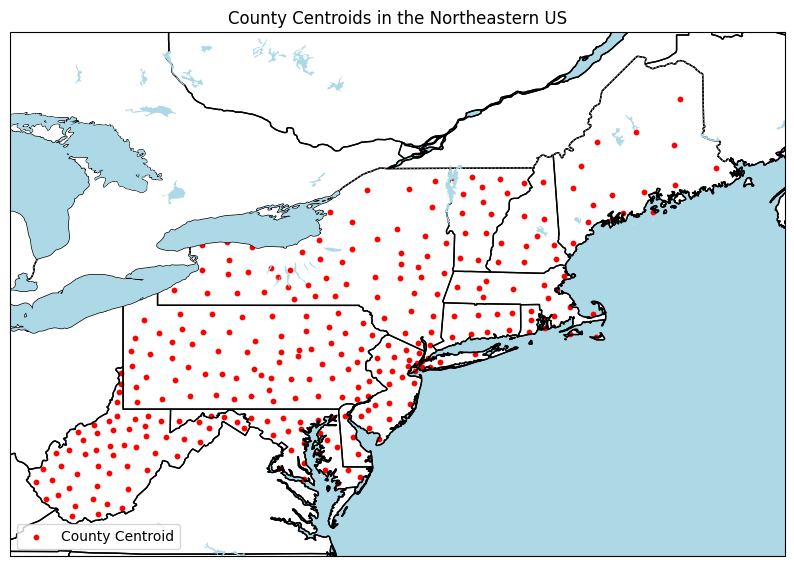

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Plot setup
fig, ax = plt.subplots(figsize=(10, 10),
                       subplot_kw={'projection': ccrs.PlateCarree()})

# Zoom to the northeastern US
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.STATES, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot centroid points
ax.scatter(centroids_df['lon'], centroids_df['lat'],
           color='red', s=10, transform=ccrs.PlateCarree(), label='County Centroid')

plt.title('County Centroids in the Northeastern US')
plt.legend(loc='lower left')
plt.show()


In [16]:
from shapely.geometry import Point
import cartopy.feature as cfeature

# Load land geometry
land_geom = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m'
).geometries()

# Flatten geometries into one union
from shapely.ops import unary_union
land_union = unary_union(list(land_geom))

# Replace centroid with representative_point() ONLY if on land
geom = shape(rec.shape.__geo_interface__)
rep_point = geom.representative_point()

# If rep_point not on land, try shifting to another
if not land_union.contains(rep_point):
    rep_point = geom.centroid  # fallback (or skip)
lon, lat = rep_point.x, rep_point.y

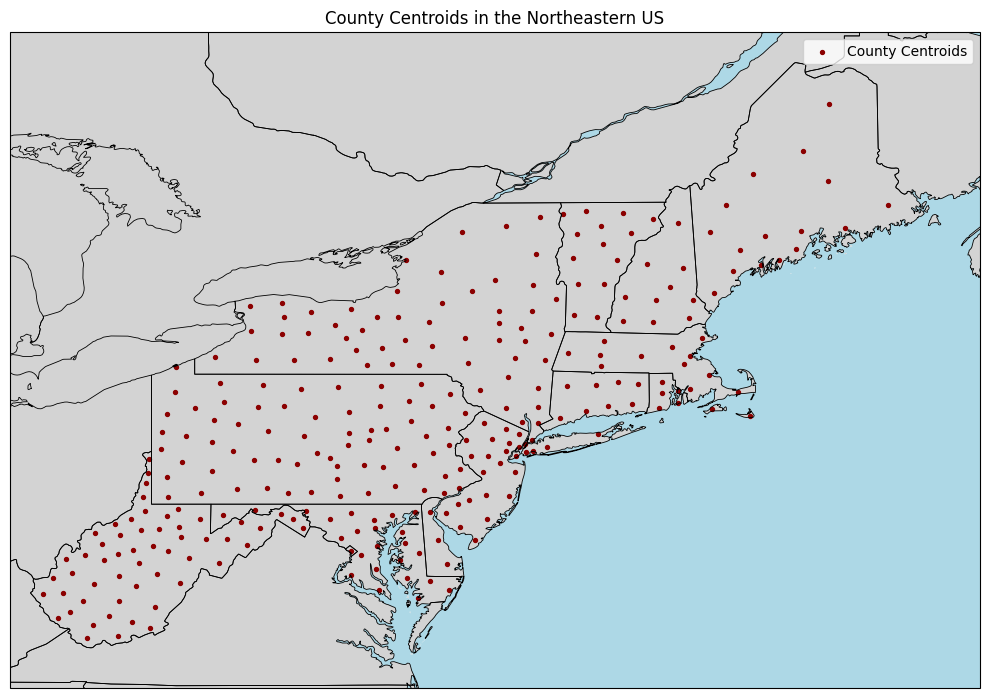

In [10]:
import shapefile  # pyshp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import shape
import pandas as pd
import cartopy.feature as cfeature

# Define FIPS to state name mapping
state_fips_to_name = {
    '09': 'Connecticut',
    '23': 'Maine',
    '25': 'Massachusetts',
    '33': 'New Hampshire',
    '34': 'New Jersey',
    '36': 'New York',
    '42': 'Pennsylvania',
    '44': 'Rhode Island',
    '50': 'Vermont',
    '10': 'Delaware',
    '24': 'Maryland',
    '54': 'West Virginia'
}
states_to_plot = list(state_fips_to_name.values())

# Read shapefile
sf = shapefile.Reader("/Users/adriennekirk/Downloads/tl_2020_us_county/tl_2020_us_county.shp")
records = sf.shapeRecords()


# Plot it
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-83, -66, 36.5, 48], crs=ccrs.PlateCarree())

# Base map features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.6)

# Plot centroids
ax.scatter(df['lon'], df['lat'], color='darkred', s=8, label='County Centroids')

plt.title("County Centroids in the Northeastern US")
plt.legend()
plt.tight_layout()
plt.show()